# _STAT 201 Group Project Proposal_

##### _Group 31: Alexandr Kim, Yingshan Wu, Yang Lei, Harbor Zhang_

## Introduction

In our statistical investigation, we will be looking at street trees dataset provided by the City of Vancouver (See __Appendix A__). The street tree dataset lists out the information about the trees that are located within city of Vancouver with diverse classifications such as species name of the tree, common name, number of trees on street side name, and number of trees on different neighbourhood. We are going to select the `CURB` (which classifies the data into 2 category of whether or not the tree is located at the curb) and evaluating it with the `DIAMETER` (in inches). Using this data set, we are going to mainely use `infer`, `tidyverse`, and `ggplot2` packages in order to compute hypothesis testing utilising difference in medians of two type of trees that we selected under the significance level of 95% ($\alpha$ = 0.05) to answer an inferential question: "Are the diametres of trees at the curb different from those which are not located at the curb?". And later on, we are also going to contruct a 95% confidence interval to predict the true population difference in medians of tree diameters on and not on the curb.

## Preliminary Results

_Loading in the necessary libraries for this data analysis_

In [1]:
library(tidyverse)
library(cowplot)
library(gridExtra)
library(infer)
library(repr)
library(ggplot2)
library(data.table)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




While loading the library and shows error that the R cannot load a package, go to __Appendix B__ and install all relevant packages for this statistical investigation.

_Tidying up the `street_trees_data` for our investigation_

In [2]:
street_trees_data <- fread("https://opendata.vancouver.ca/explore/dataset/street-trees/download/?format=csv&timezone=America/Los_Angeles&lang=en&use_labels_for_header=true&csv_separator=%3B")

glimpse(street_trees_data)

Rows: 151,194
Columns: 19
$ TREE_ID            <int> 4559, 4562, 4568, 4571, 4579, 4582, 4584, 4590, 459…
$ CIVIC_NUMBER       <int> 330, 349, 349, 362, 493, 526, 550, 555, 555, 710, 7…
$ STD_STREET         <chr> "E 6TH AV", "E 6TH AV", "E 6TH AV", "E 6TH AV", "RO…
$ GENUS_NAME         <chr> "ACER", "GLEDITSIA", "GLEDITSIA", "ACER", "LIRIODEN…
$ SPECIES_NAME       <chr> "PLATANOIDES", "TRIACANTHOS", "TRIACANTHOS", "RUBRU…
$ CULTIVAR_NAME      <chr> "CRIMSON KING", "INERMIS", "INERMIS", "", "", "PINK…
$ COMMON_NAME        <chr> "CRIMSON KING NORWAY MAPLE", "THORNLESS HONEYLOCUST…
$ ASSIGNED           <chr> "N", "N", "N", "N", "N", "N", "N", "N", "N", "N", "…
$ ROOT_BARRIER       <chr> "N", "N", "N", "N", "N", "N", "N", "N", "N", "N", "…
$ PLANT_AREA         <chr> "B", "B", "B", "B", "C", "5", "5", "5", "4", "3", "…
$ ON_STREET_BLOCK    <int> 300, 300, 300, 2200, 400, 500, 500, 500, 2100, 700,…
$ ON_STREET          <chr> "E 6TH AV", "E 6TH AV", "E 6TH AV", "BRUNSWICK ST",…
$ NEIGHBOURHOO

As we can see that our original data set contains lots of irrelevant data in our statistical investigation as we only need `CURB` and `DIAMETER`. Also, it will most likely not contain `NA` values in our dataset as it is a data collected by the City of Vancouver, we are going to filter out all `NA` values using the function `!is.na()`.

In [3]:
set.seed(1234)

tidy_street_trees <- 
    street_trees_data %>%
    filter(!is.na(DIAMETER)) %>%
    select(CURB, DIAMETER)
head(tidy_street_trees)

CURB,DIAMETER
<chr>,<dbl>
Y,30.00
Y,11.00
Y,10.00
Y,12.00
Y,6.00
Y,16.75


_As our data is tidied up, we are going to first visualise our data using `boxplot()` (code that creates side-by-side bar graph) in order to see whether there are any outliers that may impact our investigation._

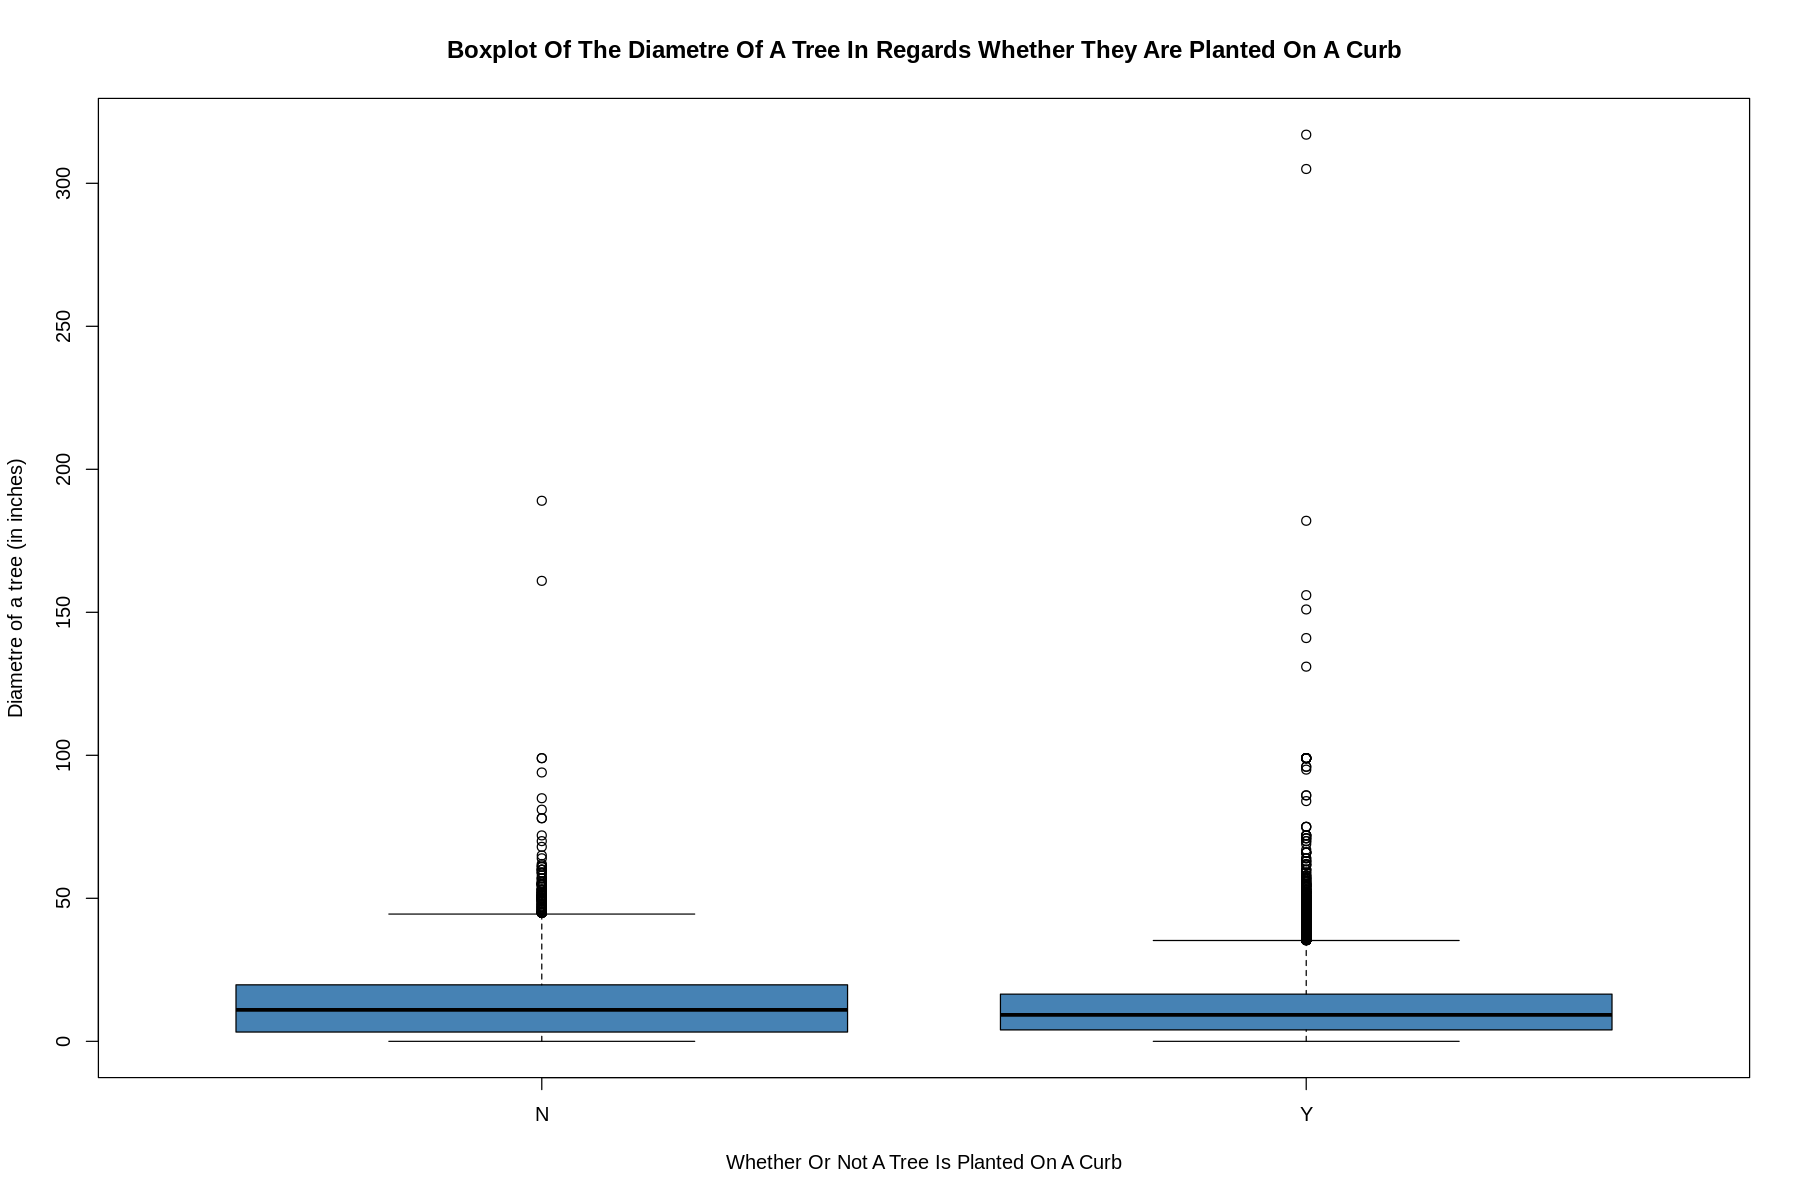

In [4]:
set.seed(1234)
options(repr.plot.width = 15, repr.plot.height = 10)

tree_curb_Y <- 
    tidy_street_trees %>%
    filter(CURB == "Y") 

tree_curb_N <- 
    tidy_street_trees %>%
    filter(CURB == "N") 

boxplot(tidy_street_trees$DIAMETER ~ tidy_street_trees$CURB,
        col='steelblue',
        main='Boxplot Of The Diametre Of A Tree In Regards Whether They Are Planted On A Curb',
        xlab='Whether Or Not A Tree Is Planted On A Curb',
        ylab='Diametre of a tree (in inches)') 

Through the boxplot above, we can tell there are some observations classified as outliers (Separated dots in both boxplots indicate the outliers). This means that using median as our measure of centre is better option than the mean as the median "is not affected by the precise numerical values of the outliers" (Illowsky & Dean, n.d.). Therefore, in our investigation, we will be utilising median as our measure of centre. As we now know that there are lots of outliers at the upper tail region, we will create histograms in order to see the trend of the distribution effectively and more visually.

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


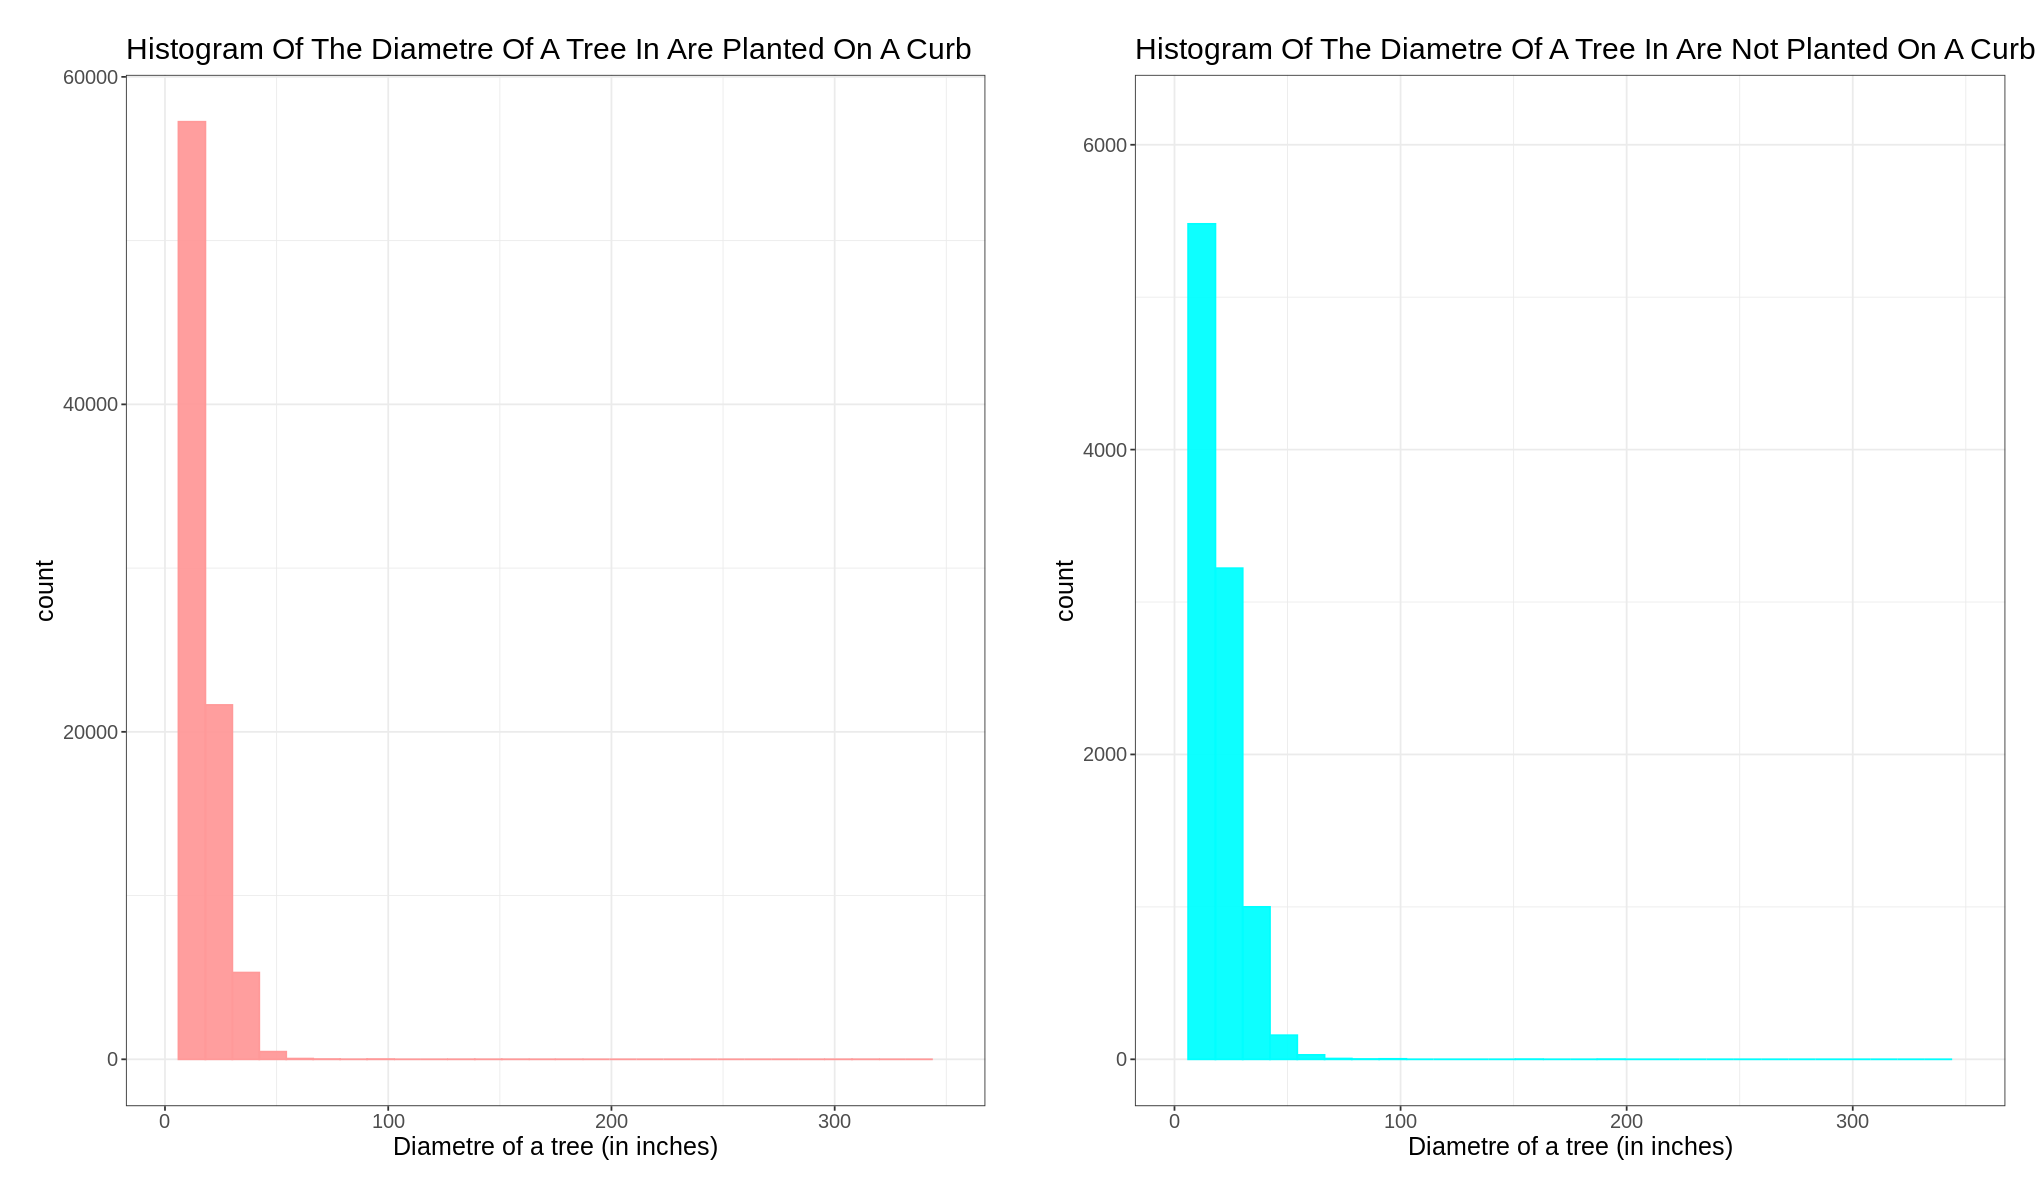

In [5]:
set.seed(1234)
options(repr.plot.width = 17, repr.plot.height = 10)

tree_curb_Y_histo <- 
    tree_curb_Y %>%
    ggplot() +
        geom_histogram(aes(DIAMETER), colour = "#FF9999", fill = "#FF9999", alpha = .95 ,bins = 30) +
        labs(x = 'Diametre of a tree (in inches)',
             title = 'Histogram Of The Diametre Of A Tree In Are Planted On A Curb') +
        scale_x_continuous(limits = c(0, 350)) +
        theme_bw() +
        theme(text = element_text(size = 15))

tree_curb_N_histo <- 
    tree_curb_N %>%
    ggplot() +
        geom_histogram(aes(DIAMETER), colour = "#00FFFF", fill = "#00FFFF", alpha = .95 ,bins = 30) +
        labs(x = 'Diametre of a tree (in inches)',
             title = 'Histogram Of The Diametre Of A Tree In Are Not Planted On A Curb') +
        scale_x_continuous(limits = c(0, 350)) +
        theme_bw() +
        theme(text = element_text(size = 15))

tree_curb_histo <- plot_grid(tree_curb_Y_histo, tree_curb_N_histo, scale = 0.95)
tree_curb_histo

After visualising the data into two histograms above, we can clearly tell that the observations are significantly right skewed. We are going to utilise sampling distribution of the medians, as we can get brief idea of how the medians are distributed.

Setting `type = "bootstrap"` in `generate()`.

Setting `type = "bootstrap"` in `generate()`.



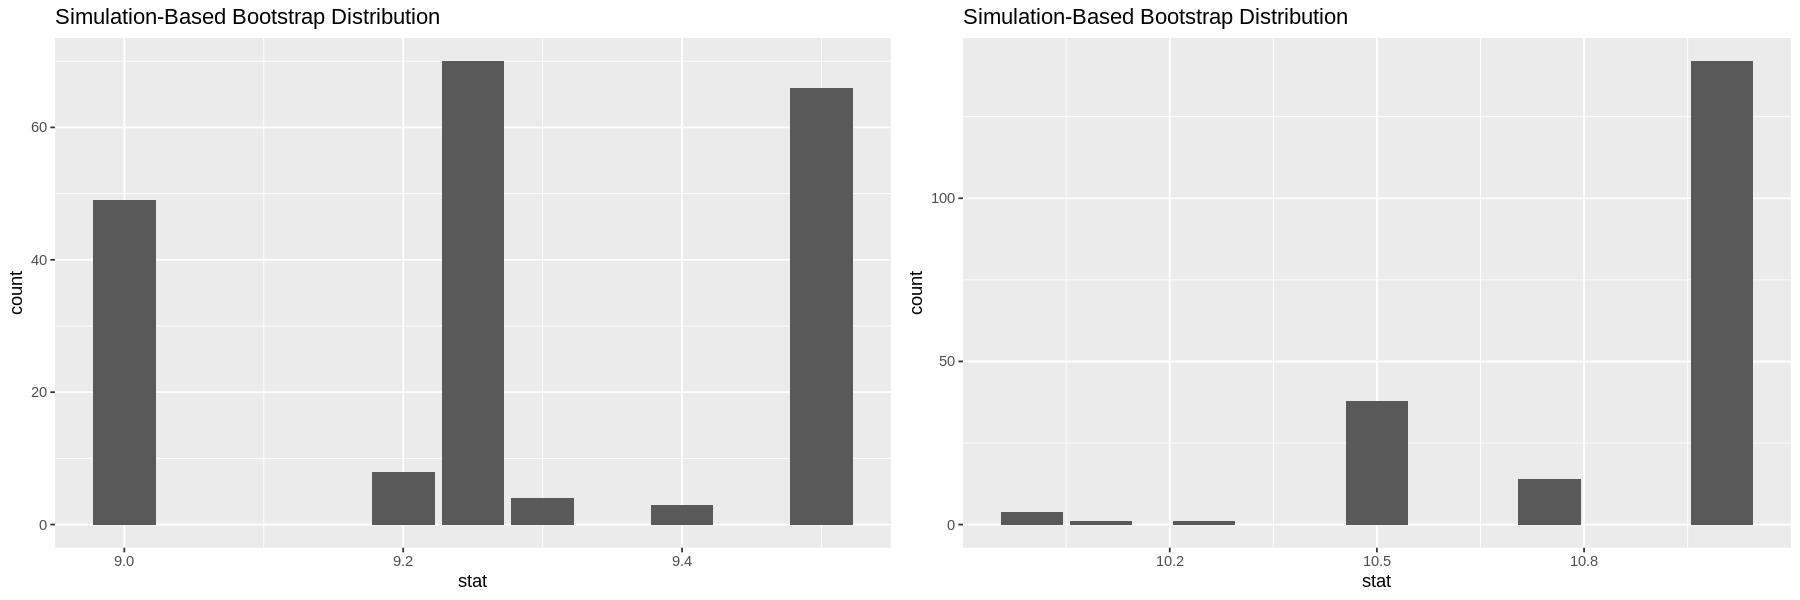

In [6]:
set.seed(1234)
options(repr.plot.width = 15, repr.plot.height = 5)

bootstrap_distribution_Y <- tree_curb_Y %>% 
  specify(response = DIAMETER) %>% 
  generate(reps = 200) %>% 
  calculate(stat = "median") %>%
  visualise()

bootstrap_distribution_N <- tree_curb_N %>% 
  specify(response = DIAMETER) %>% 
  generate(reps = 200) %>% 
  calculate(stat = "median") %>%
  visualise()

tree_curb_bootstrap_dist <- plot_grid(bootstrap_distribution_Y, bootstrap_distribution_N)
tree_curb_bootstrap_dist

As we can see from histograms above that we visualised a bootstrap distribution of sample medians (`stat` in our x-axis labelling represents the median values) of each categories (`CRUB == "Y"` and `CRUB == "N"`), the graph became more normal shape than it's original observation data. The histograms above follow to some extent normal shape than the histogram from original street tree sample, it does not exactly demonstrates an ideal normal distribution graph as due to small number of repitition. This limitation occurred due to limitation of our kurnel that only allows up to approximately 200 `reps`.

### Contructing Hypothesis test

First, our population parameter of interest is the difference in population medians of tree diameters $d_{y}$ - $d_{n}$, where $d_{y}$ is the median of diameters of trees on the curb, and $d_{n}$ is of trees not on the curb. Then, we set the null hypothesis $H_{0}$ to be that there is no difference in medians of diameters of trees on and not on the curb. And the alternative hypothesis $H_{A}$ to be that there is a difference. 

$H_{0} : d_{y} - d_{n} = 0 $

$H_{A} : d_{y} - d_{n} \neq 0 $

_We first count the numbers of trees planted on and not on the curb respectively in `tidy_street_trees` to get a picture of our data._

In [7]:
set.seed(1234)

tree_count <-
    tidy_street_trees %>% 
    count(CURB)

tree_count

CURB,n
<chr>,<int>
N,16053
Y,135141


_Then, calculate the observed test statistic (median of trees on the curb minus median of trees not on the curb)  using `tidy_street_trees` with the `infer` package._

In [8]:
set.seed(1234)

obs_diff_in_medians <- tidy_street_trees %>%
    specify(formula = DIAMETER ~ CURB) %>%
    calculate(stat = "diff in medians", order = c("Y", "N"))

obs_diff_in_medians

stat
<dbl>
-1.75


_Next, generate the null distribution with 100 samples and calculate median of trees on the curb minus median of trees not on the curb, using `tidy_street_trees` with the `infer` package._

In [9]:
set.seed(1234)

null_diff_in_medians <- 
    tidy_street_trees %>%
    specify(formula = DIAMETER ~ CURB) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 100, type = "permute") %>%
    calculate(stat = "diff in medians", order = c("Y", "N"))

head(null_diff_in_medians)

replicate,stat
<int>,<dbl>
1,0.00
2,0.00
3,-0.25
4,0.00
5,-0.50
6,0.00


_Visualize the result of the hypothesis test with a vertical bar for the observed test statistic, and shade the tails._

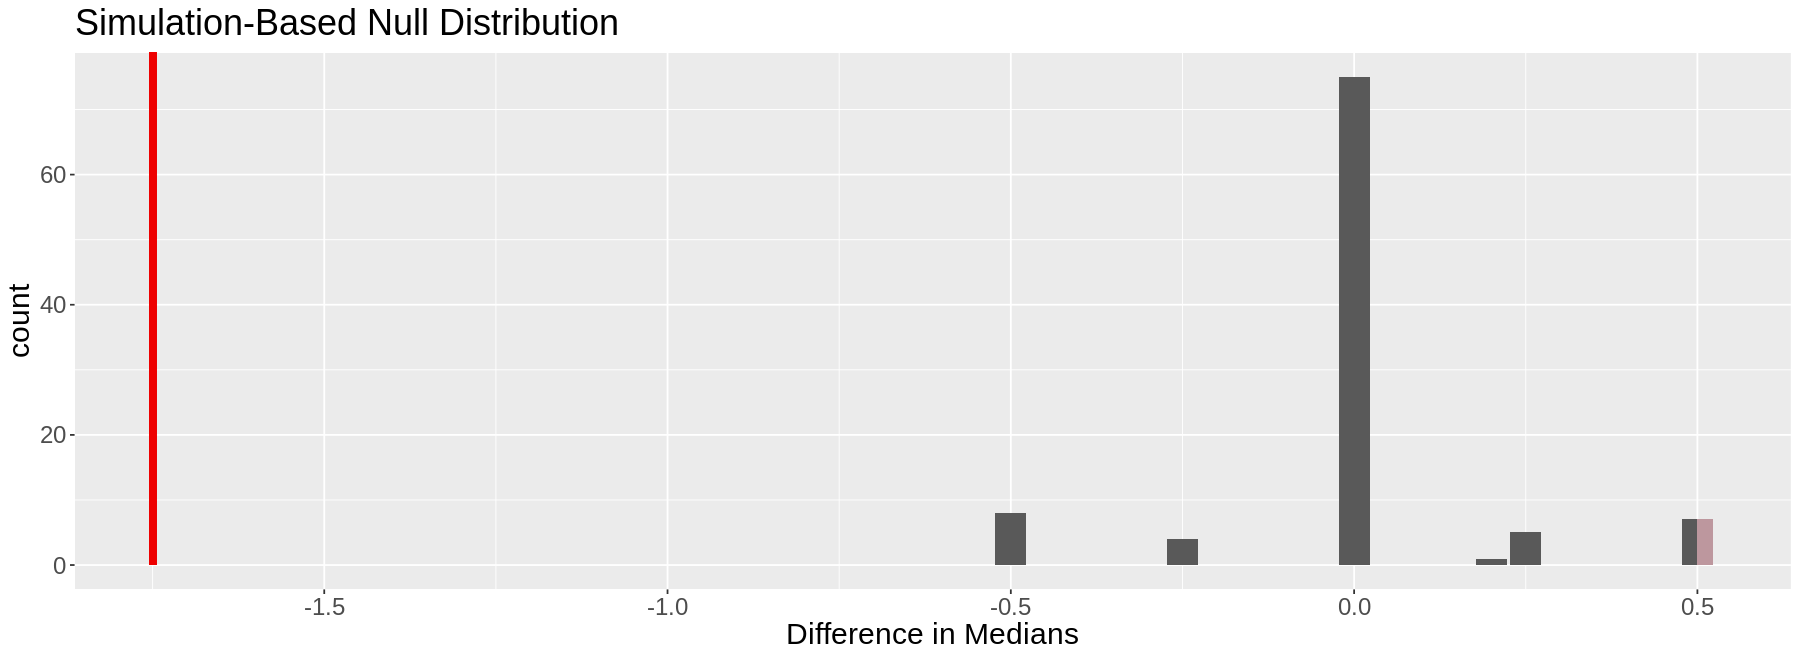

In [10]:
set.seed(1234)
options(repr.plot.width = 15, repr.plot.height = 5.5)

diff_in_medians_plot <-
        visualize(null_diff_in_medians, bins = 30) +
        shade_p_value(obs_stat = obs_diff_in_medians, direction = "both") +
        xlab("Difference in Medians") +
        theme(text = element_text(size = 18))

diff_in_medians_plot

_We then are able to obtain the p-value of the observed test statistic (`obs_diff_in_medians`) from the null distribution of medians (`null_diff_in_medians`)._

In [11]:
set.seed(1234)

p_val_diff_medians <- 
    null_diff_in_medians %>% 
    get_p_value(obs_stat = obs_diff_in_medians, direction = "both")

p_val_diff_medians

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


Given that we now obtain a p-value of 0 just through computing p-value analysis using r. However, as we are using 100 repetitions to calculate the sample, we are going to report that p-value is < 0.01. P-value being less than 0.01 is smaller than our pre-specified significance level of $\alpha = 0.05$, we now can conclude that we reject $H_{0}$ at the 5% significance level. In other words, we reject the $H_{0}$, which there is no difference between medians of tree diameters on and not on the curb, at a significance level of $\alpha = 0.05$.

### Computing Confidence Interval

Next, we are going to contruct a 95% confidence Interval to try to capture the true population difference in median of diameters of trees on and not on the curb. First, find the bootstrap distribution for the difference in medians with the `infer` package.

In [12]:
set.seed(1234)

diff_in_medians_bootstrap_dist <-
    tidy_street_trees %>% 
    specify(formula = DIAMETER ~ CURB) %>%
    generate(reps = 100, type = "bootstrap") %>%
    calculate(stat = "diff in medians", order = c("Y", "N"))

head(diff_in_medians_bootstrap_dist)

replicate,stat
<int>,<dbl>
1,-2.00
2,-2.00
3,-1.75
4,-1.50
5,-2.00
6,-1.50


_Then, obtain the 95% confidence interval for the difference in median._

In [13]:
set.seed(1234)

diff_in_medians_ci <-
    diff_in_medians_bootstrap_dist %>%
    summarise(lower_ci = quantile(stat, 0.025), upper_ci = quantile(stat, 0.975))

diff_in_medians_ci

lower_ci,upper_ci
<dbl>,<dbl>
-2,-1


_Visualize the confidence interval (`diff_in_medians_ci`) with the bootstrap distribution (`diff_in_medians_bootstrap_dist`)._

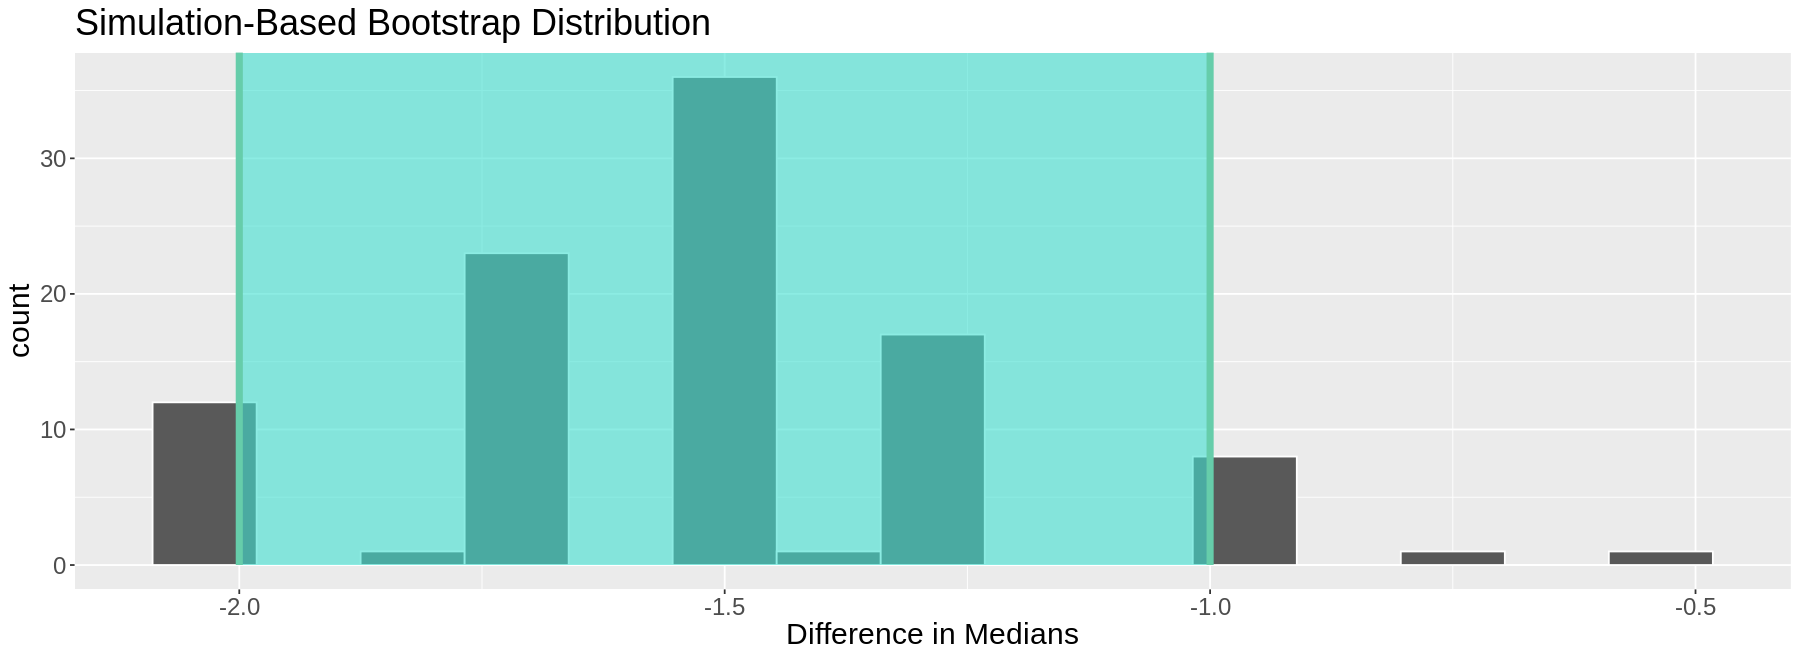

In [14]:
set.seed(1234)

diff_in_medians_ci_plot <-
        visualize(diff_in_medians_bootstrap_dist) + 
    shade_confidence_interval(endpoints = diff_in_medians_ci) +
    xlab("Difference in Medians") +
    theme(text = element_text(size = 18))

diff_in_medians_ci_plot

## Methods

We first decide our null hypothesis and alternative hypothesis. The null hypothesis is that the median diameter of the trees that are located at the curb is the same as the median diameter of the trees which are not at the curb. The alternative hypothesis is that the median diameter of the trees that are located at the curb is different from the median diameter of the trees which are not at the curb. Then we use the infer package to calculate the observed test statistic (observed difference in medians). After that, we generate 1000 samples from the null distribution and calculate the difference in medians for each sample. Then, we visualise the null distribution and the observed test statistic in one plot, and we shade the two-sided p-value. Followingly, we compare the p-value with the 5% significance level and make our conclusion whether to reject the null hypothesis. The next step is that we are going to find a 95% confidence interval for the difference in median. We will generate 1000 bootstrapping samples and calculate the difference in medians for each sample. Then we get our confidence interval and visualise it with the bootstrap distribution. 

### Expected Outcomes and Significance

We assume that the median diameter of the trees planted on the curb would be different from the median diameter of the trees planted not on the curb. The results we find will help conclude whether there is any statistically significant difference between tree diameters on and not on the curb. In reality, city planning might have different needs and standards on trees’ thickness on and not on the curb. This finding could provide evidence on whether existing trees on and not on the curb have differences in thickness, and it could present as data assisting future analysis. For future tree planting in Vancouver, we can use the results we find from this analysis to do effective city planning as the City of Vancouver can better arrange trees with different diameters to look more standardised and visually appealing.

## References and Appendix

### References

_All in-text citation and references are written in  APA 7 (American Psychological Association 7th edition) style_

Illowsky, B., & Dean, S. (n.d.). 2.6: Measures of the Center of the Data. In _Introductory Statistics_. De Anza College: LibreTexts. Retrieved July 22, 2022, from https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(OpenStax)/02%3A_Descriptive_Statistics/2.06%3A_Measures_of_the_Center_of_the_Data

### Appendix A: Data set for street trees in Vancouver (BC, Canada) recorded by City of Vancouver

In [3]:
library(data.table)

In [4]:
street_trees_data <- fread("https://opendata.vancouver.ca/explore/dataset/street-trees/download/?format=csv&timezone=America/Los_Angeles&lang=en&use_labels_for_header=true&csv_separator=%3B")

head(street_trees_data)

TREE_ID,CIVIC_NUMBER,STD_STREET,GENUS_NAME,SPECIES_NAME,CULTIVAR_NAME,COMMON_NAME,ASSIGNED,ROOT_BARRIER,PLANT_AREA,ON_STREET_BLOCK,ON_STREET,NEIGHBOURHOOD_NAME,STREET_SIDE_NAME,HEIGHT_RANGE_ID,DIAMETER,CURB,DATE_PLANTED,Geom
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<date>,<chr>
4559,330,E 6TH AV,ACER,PLATANOIDES,CRIMSON KING,CRIMSON KING NORWAY MAPLE,N,N,B,300,E 6TH AV,MOUNT PLEASANT,EVEN,4,30.00,Y,NA,"{""""coordinates"""": [-123.098252, 49.265375], """"type"""": """"Point""""}"
4562,349,E 6TH AV,GLEDITSIA,TRIACANTHOS,INERMIS,THORNLESS HONEYLOCUST,N,N,B,300,E 6TH AV,MOUNT PLEASANT,ODD,4,11.00,Y,NA,"{""""coordinates"""": [-123.097359, 49.265525], """"type"""": """"Point""""}"
4568,349,E 6TH AV,GLEDITSIA,TRIACANTHOS,INERMIS,THORNLESS HONEYLOCUST,N,N,B,300,E 6TH AV,MOUNT PLEASANT,ODD,4,10.00,Y,NA,"{""""coordinates"""": [-123.097074, 49.265522], """"type"""": """"Point""""}"
4571,362,E 6TH AV,ACER,RUBRUM,,RED MAPLE,N,N,B,2200,BRUNSWICK ST,MOUNT PLEASANT,EVEN,5,12.00,Y,NA,"{""""coordinates"""": [-123.096847, 49.265189], """"type"""": """"Point""""}"
4579,493,ROBSON ST,LIRIODENDRON,TULIPIFERA,,TULIPTREE,N,N,C,400,ROBSON ST,DOWNTOWN,ODD,2,6.00,Y,NA,"{""""coordinates"""": [-123.117631, 49.280036], """"type"""": """"Point""""}"
4582,526,E 6TH AV,PRUNUS,SERRULATA,PINK PERFECTION,PINK PERFECTION CHERRY,N,N,5,500,E 6TH AV,MOUNT PLEASANT,EVEN,3,16.75,Y,NA,"{""""coordinates"""": [-123.092535, 49.265211], """"type"""": """"Point""""}"


### Appendix B: Adding Necessary Packages

In order to load the packages, we have to use the code `install.packages()`. Before running the code cell below, check whether the packages are already installed in R as it takes a while to run this cell.

In [1]:
install.packages("tidyverse")
install.packages("tidymodels")
install.packages("repr")
install.packages("cowplot")
install.packages("ggplot2")
install.packages("GGally")
install.packages("digest")
install.packages("infer")
install.packages("RCurl")
install.packages("data.table")

also installing the dependencies ‘rappdirs’, ‘gargle’, ‘ids’, ‘dtplyr’, ‘googledrive’, ‘googlesheets4’, ‘lubridate’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘warp’, ‘patchwork’, ‘slider’, ‘conflicted’, ‘infer’, ‘modeldata’, ‘recipes’, ‘rsample’, ‘tune’, ‘workflowsets’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message in install.packages("cowplot"):
“installation of package ‘cowplot’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message in install.packages("GGally"):
“installation of package ‘GGally’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages i

After installing relevant packages, we need to load it into workflow using `library()`